#### Plotly Graphs on The Times Higher Education World University Rankings

Reference:
DATAI. Plotly Tutorial for Beginners. Retrieved from
https://www.kaggle.com/kanncaa1/plotly-tutorial-for-beginners/notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from plotly import tools
from wordcloud import WordCloud

In [2]:
# Import csv file
url="https://raw.githubusercontent.com/arnaudbenard/university-ranking/master/timesData.csv"
df_rank = pd.read_csv(url)

In [20]:
# Return first n rows of data
df_rank.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [17]:
# Check the shape of the data
df_rank.shape

(2603, 14)

In [18]:
# Get a list of the column names
df_rank.columns

Index(['world_rank', 'university_name', 'country', 'teaching', 'international',
       'research', 'citations', 'income', 'total_score', 'num_students',
       'student_staff_ratio', 'international_students', 'female_male_ratio',
       'year'],
      dtype='object')

In [14]:
# Run summary statistics
df_rank.describe()

,teaching,research,citations,student_staff_ratio,year
count,2603.000000,2603.000000,2603.000000,2544.000000,2603.000000
mean,37.801498,35.910257,60.921629,18.445283,2014.075682
std,17.604218,21.254805,23.073219,11.458698,1.685733
min,9.900000,2.900000,1.200000,0.600000,2011.000000
25%,24.700000,19.600000,45.500000,11.975000,2013.000000
50%,33.900000,30.500000,62.500000,16.100000,2014.000000
75%,46.400000,47.250000,79.050000,21.500000,2016.000000
max,99.700000,99.400000,100.000000,162.600000,2016.000000


In [19]:
# Count non-NA cells for each column
df_rank.count()

world_rank                2603
university_name           2603
country                   2603
teaching                  2603
international             2603
research                  2603
citations                 2603
income                    2603
total_score               2603
num_students              2544
student_staff_ratio       2544
international_students    2536
female_male_ratio         2370
year                      2603
dtype: int64

In [20]:
# Count NA cells for each column
df_rank.isnull().sum()

world_rank                  0
university_name             0
country                     0
teaching                    0
international               0
research                    0
citations                   0
income                      0
total_score                 0
num_students               59
student_staff_ratio        59
international_students     67
female_male_ratio         233
year                        0
dtype: int64

#### Line Charts: Citation and Teaching vs World Rank of Top 100 Universities

In [3]:
# Create data frame for top 100 universities
df_top100 = df_rank.iloc[:100,:]

In [4]:
# import graph objects as "go"
import plotly.graph_objs as go

In [5]:
# Creating trace on citations
trace_cite = go.Scatter(x = df_top100.world_rank,
                        y = df_top100.citations,
                        mode = "lines",
                        name = "citations",
                        marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                        text= df_top100.university_name)

In [6]:
# Creating trace on teaching
trace_teach = go.Scatter(x = df_top100.world_rank,
                         y = df_top100.teaching,
                         mode = "lines+markers",
                         name = "teaching",
                         marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                         text= df_top100.university_name)

In [11]:
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *

init_notebook_mode(connected=True)  

# Create a list to add traces
data = [trace_cite, trace_teach]

layout = dict(title = 'Citation and Teaching vs World Rank of Top 100 Universities',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False))
fig1 = dict(data = data, layout = layout)
iplot(fig1)

#### Scatter Plots: Citation vs world rank of top 100 universities in year 2014, 2015 and 2016

In [7]:
# Create data frame for top 100 universities by year
df2014 = df_rank[df_rank.year == 2014].iloc[:100,:]
df2015 = df_rank[df_rank.year == 2015].iloc[:100,:]
df2016 = df_rank[df_rank.year == 2016].iloc[:100,:]

In [8]:
# creating trace for year 2014
trace_2014 = go.Scatter(x = df2014.world_rank,
                         y = df2014.citations,
                         mode = "markers",
                         name = "2014",
                         marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                         text= df2014.university_name)
# creating trace for year 2015
trace_2015 = go.Scatter(x = df2015.world_rank,
                        y = df2015.citations,
                        mode = "markers",
                        name = "2015",
                        marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                        text= df2015.university_name)
# creating trace for year 2016
trace_2016 = go.Scatter(x = df2016.world_rank,
                        y = df2016.citations,
                        mode = "markers",
                        name = "2016",
                        marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                        text= df2016.university_name)

In [12]:
# Create a list to add traces
data = [trace_2014, trace_2015, trace_2016]

layout = dict(title = 'Citation vs world rank of top 100 universities in year 2014, 2015 and 2016',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Citation',ticklen= 5,zeroline= False))
fig2 = dict(data = data, layout = layout)
iplot(fig2)

#### Bar Graphs:  citations and teaching of top 3 universities in year 2014

In [9]:
# Create data frames
df2014_top3 = df_rank[df_rank.year == 2014].iloc[:3,:]
df2014_top3

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1002,1,California Institute of Technology,United States of America,94.4,65.8,98.2,99.8,91.2,94.9,"2,243",6.9,27%,33 : 67,2014
1003,2,Harvard University,United States of America,95.3,66.2,98.5,99.1,40.6,93.9,"20,152",8.9,25%,NaN,2014
1004,2,University of Oxford,United Kingdom,89.0,90.2,98.5,95.4,90.3,93.9,"19,919",11.6,34%,46 : 54,2014


In [10]:
# create trace for citations of top 3 universities in year 2014
trace_2014top3_cite = go.Bar(x = df2014_top3.university_name,
                             y = df2014_top3.citations,
                             name = "citations",
                             marker = dict(color = 'rgba(140, 158, 255, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                             text = df2014.country)

# create trace for teaching of top 3 universities in year 2014
trace_2014top3_teach = go.Bar(x = df2014_top3.university_name,
                               y = df2014_top3.teaching,
                               name = "teaching",
                               marker = dict(color = 'rgba(255, 255, 128, 0.5)',
                               line=dict(color='rgb(0,0,0)',width=1.5)),
                               text = df2014.country)

In [13]:
data = [trace_2014top3_cite, trace_2014top3_teach]
layout = go.Layout(barmode = "group",
                   title= "Citations and teaching of top 3 universities in 2014")
fig3 = go.Figure(data = data, layout = layout)
iplot(fig3)

#### Stacked Bar Chart: citations and teaching of top 3 universities in year 2014

In [16]:
# create trace for citations of top 3 universities in year 2014
trace_2014top3_cite1 = {'x': df2014_top3.university_name,
                        'y': df2014.citations,
                        'name': 'citation',
                        'type': 'bar'}

# create trace for teaching of top 3 universities in year 2014
trace_2014top3_teach1 = {'x': df2014_top3.university_name,
                         'y': df2014.teaching,
                         'name': 'teaching',
                         'type': 'bar'}

In [17]:
data = [trace_2014top3_cite1, trace_2014top3_teach1]
layout = {'xaxis': {'title': 'Top 3 universities'},
          'barmode': 'relative',
          'title': 'Citations and teaching of top 3 universities in 2014'}
fig4 = go.Figure(data = data, layout = layout)
iplot(fig4)

#### Horizontal bar charts: Citation vs income for universities

In [18]:
# Create data frames
df2016 = df_rank[df_rank.year == 2016].iloc[:7,:]

# Prepare data
y_saving = [each for each in df2016.research]
y_net_worth  = [float(each) for each in df2016.income]
x_saving = [each for each in df2016.university_name]
x_net_worth  = [each for each in df2016.university_name]

In [19]:
trace_saving = go.Bar(x=y_saving,
                      y=x_saving,
                      marker=dict(color='rgba(171, 50, 96, 0.6)',line=dict(color='rgba(171, 50, 96, 1.0)',width=1)),
                      name='research',
                      orientation='h',)

trace_networth = go.Scatter(x=y_net_worth,
                             y=x_net_worth,
                             mode='lines+markers',
                             line=dict(color='rgb(63, 72, 204)'),
                             name='income',)

In [20]:
layout = dict(title='Citations and income',
              yaxis=dict(showticklabels=True,domain=[0, 0.85]),
              yaxis2=dict(showline=True,showticklabels=False,linecolor='rgba(102, 102, 102, 0.8)',linewidth=2,
                          domain=[0, 0.85]),
              xaxis=dict(zeroline=False,showline=False,showticklabels=True,showgrid=True,domain=[0, 0.42]),
              xaxis2=dict(zeroline=False,showline=False,showticklabels=True,showgrid=True,domain=[0.47, 1],
                          side='top',dtick=25),
              legend=dict(x=0.029,y=1.038,font=dict(size=10) ),
              margin=dict(l=200, r=20,t=70,b=70),
              paper_bgcolor='rgb(248, 248, 255)',
              plot_bgcolor='rgb(248, 248, 255)',)

annotations = []

y_s = np.round(y_saving, decimals=2)
y_nw = np.rint(y_net_worth)

In [21]:
# Add labels
for ydn, yd, xd in zip(y_nw, y_s, x_saving):
    # labeling the scatter savings
    annotations.append(dict(xref='x2', yref='y2', y=xd, x=ydn - 4,text='{:,}'.format(ydn),
                            font=dict(family='Arial', size=12,color='rgb(63, 72, 204)'),showarrow=False))
    # labeling the bar net worth
    annotations.append(dict(xref='x1', yref='y1', y=xd, x=yd + 3,text=str(yd),font=dict(family='Arial', size=12,
                                                                                        color='rgb(171, 50, 96)'),
                                                                                        showarrow=False))

layout['annotations'] = annotations

In [22]:
# Create two subplots
fig5 = tools.make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                          shared_yaxes=False, vertical_spacing=0.001)

fig5.append_trace(trace_saving, 1, 1)
fig5.append_trace(trace_networth, 1, 2)

fig5['layout'].update(layout)
iplot(fig5)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



#### Pie Chart: Students rate of top 7 universities in 2016

In [23]:
# Create values for the pie chart
pie1 = df2016.num_students

# Replace comma with period in num_students
pie1_list = [float(each.replace(',', '.')) for each in df2016.num_students]  # str(2,4)=>str(2.4)=>float(2.4)=2.4

# Create labels
labels = df2016.university_name

In [24]:
# Create figure
fig6 = {"data": [{"values": pie1_list,
                  "labels": labels,
                  "domain": {"x": [0, .5]},
                  "name": "Number Of Students Rates",
                  "hoverinfo":"label + percent + name",
                  "hole": .3,
                  "type": "pie"},],
        "layout": {"title":"Universities Number of Students rates",
                   "annotations": [{ "font": { "size": 20},
                                     "showarrow": False,
                                     "text": "Number of Students",
                                     "x": 0.20,
                                     "y": 1},]
                   }
        }
iplot(fig6)

#### Bubble Chart: World's Top 20 University teaching score with number of students (size) and international score (color) in 2016

In [25]:
# Prepare data
df2016_top20 = df_rank[df_rank.year == 2016].iloc[:20,:]
num_students_size  = [float(each.replace(',', '.')) for each in df2016_top20.num_students]
international_color = [float(each) for each in df2016_top20.international]

data = [{'y': df2016_top20.teaching,
         'x': df2016_top20.world_rank,
         'mode': 'markers',
         'marker': {'color': international_color,
                    'size': num_students_size,
                    'showscale': True},
         "text" :  df2016_top20.university_name}]

layout={'xaxis': {'title': 'world ranking'},
        'yaxis': {'title': 'international score'},
        'title': "World's Top 20 University teaching score with number of students (size) and international score (color) in 2016"}

fig7 = go.Figure(data=data, layout=layout)

iplot(fig7)

 #### Histogram: students-staff ratio in year 2011 and 2012

In [26]:
# prepare data
x2011 = df_rank.student_staff_ratio[df_rank.year == 2011]
x2012 = df_rank.student_staff_ratio[df_rank.year == 2012]

trace_2011 = go.Histogram(x=x2011,
                          opacity=0.75,
                          name = "2011",
                          marker=dict(color='rgba(171, 50, 96, 0.6)'))

trace_2012 = go.Histogram(x=x2012,
                          opacity=0.75,
                          name = "2012",
                          marker=dict(color='rgba(12, 50, 196, 0.6)'))

In [27]:
data = [trace_2011, trace_2012]
layout = go.Layout(barmode='overlay',
                   title='Students-staff ratio in 2011 and 2012',
                   xaxis=dict(title='students-staff ratio'),
                   yaxis=dict( title='Count'),)

fig8 = go.Figure(data=data, layout=layout)
iplot(fig8)

#### Word Cloud

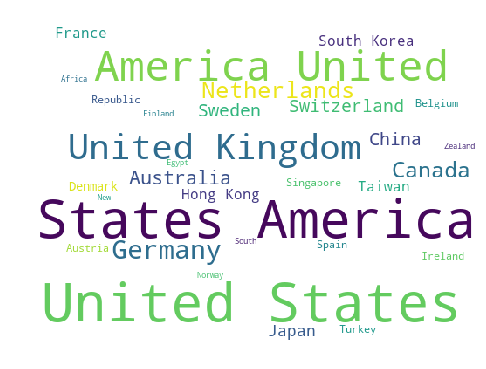

In [7]:
# Prepare data
x_country2011 = df_rank.country[df_rank.year == 2011]
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(background_color='white',
                      width=512,
                      height=384
                      ).generate(" ".join(x_country2011))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

#### Box Plots

In [28]:
# Prepare data
x2015 = df_rank[df_rank.year == 2015]

trace_score = go.Box(y=x2015.total_score,
                     name = 'total score of universities in 2015',
                     marker = dict(color = 'rgb(12, 12, 140)',)
                     )

trace_research = go.Box(y=x2015.research,
                         name = 'research of universities in 2015',
                         marker = dict(
                         color = 'rgb(12, 128, 128)',)
                         )

data = [trace_score, trace_research]
layout = go.Layout(title='Total score vs Research in year 2015',)

fig9 = go.Figure(data=data, layout=layout)
iplot(fig9)

#### Scatter Matrix Plots: to identify covariance and relation between more than 2 features

In [29]:
# import figure factory
import plotly.figure_factory as ff

# prepare data
df_2015 = df_rank[df_rank.year == 2015]
data2015 = df_2015.loc[:,["research","international", "total_score"]]
data2015["index"] = np.arange(1,len(data2015)+1)

# scatter matrix
fig10 = ff.create_scatterplotmatrix(data2015, diag='box', index='index',colormap='Portland',
                                  colormap_type='cat',
                                  height=700, width=700)
iplot(fig10)

#### Inset Plots: Inset Matrix = 2 plots in one frame

In [30]:
# first line plot
trace_teach2015 = go.Scatter(x=df_2015.world_rank,
                    y=df_2015.teaching,
                    name = "teaching",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),)

# second line plot
trace_income2015 = go.Scatter(x=df_2015.world_rank,
                    y=df_2015.income,
                    xaxis='x2',
                    yaxis='y2',
                    name = "income",
                    marker = dict(color = 'rgba(160, 112, 20, 0.8)'),)

In [31]:
data = [trace_teach2015, trace_income2015]
layout = go.Layout(xaxis2=dict(domain=[0.6, 0.95],
                               anchor='y2',),
                   yaxis2=dict(domain=[0.6, 0.95],
                               anchor='x2',),
                   title = 'Income and Teaching vs World Rank of Universities')

fig11 = go.Figure(data=data, layout=layout)
iplot(fig11)

#### 3D Scatter Plot

In [33]:
# create trace 1 that is 3d scatter
trace_3d = go.Scatter3d(x=df_2015.world_rank,
                      y=df_2015.research,
                      z=df_2015.citations,
                      mode='markers',
                      marker=dict(size=10,
                                  color='rgb(0,128,255)',)
                      )

data = [trace_3d]
layout = go.Layout(margin=dict(l=0, r=0, b=0, t=0))
fig12 = go.Figure(data=data, layout=layout)
iplot(fig12)

#### Multiple Subplots: Multiple subplots to compare a few features

In [34]:
trace1 = go.Scatter(x=df_2015.world_rank,
                    y=df_2015.research,
                    name = "research")

trace2 = go.Scatter(x=df_2015.world_rank,
                    y=df_2015.citations,
                    xaxis='x2',
                    yaxis='y2',
                    name = "citations")

trace3 = go.Scatter(x=df_2015.world_rank,
                    y=df_2015.income,
                    xaxis='x3',
                    yaxis='y3',
                    name = "income")

trace4 = go.Scatter(x=df_2015.world_rank,
                    y=df_2015.total_score,
                    xaxis='x4',
                    yaxis='y4',
                    name = "total_score")

In [35]:
data = [trace1, trace2, trace3, trace4]
layout = go.Layout(xaxis=dict(domain=[0, 0.45]),
                   yaxis=dict(domain=[0, 0.45]),
                   xaxis2=dict(domain=[0.55, 1]),
                   xaxis3=dict(domain=[0, 0.45],anchor='y3'),
                   xaxis4=dict(domain=[0.55, 1],anchor='y4'),
                   yaxis2=dict(domain=[0, 0.45],anchor='x2'),
                   yaxis3=dict(domain=[0.55, 1]),
                   yaxis4=dict(domain=[0.55, 1],anchor='x4'),
                   title = 'Research, citation, income and total score vs World Rank of Universities')

fig13 = go.Figure(data=data, layout=layout)
iplot(fig13)